In [8]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime 
import sys

In [39]:
# yfinance functions
#dat = yf.Ticker("AAPL")
#dat.info
#dat.calendar
#dat.analyst_price_targets
#dat.quarterly_income_stmt
#dat.history(period='1y')
#dat.option_chain(dat.options[0]).calls

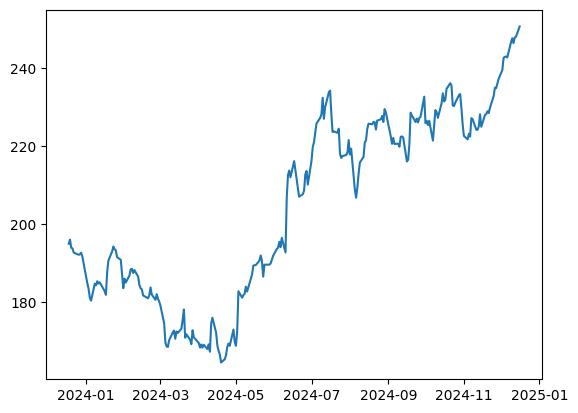

In [40]:
data=yf.Ticker("AAPL")
his=data.history(period='1y')
close_arr=np.array(his['Close'])
indices_date_array=his.index.to_numpy()

plt.plot(indices_date_array,close_arr)
plt.show()

his.to_csv('apple_closeprice.csv')


The general trend that the apple stock has been following for the past year is upwards.
Although it had an low of about $165 but it has gone from a starting price of $184.7 to $249.9 (as of 16/12/24) per stock.

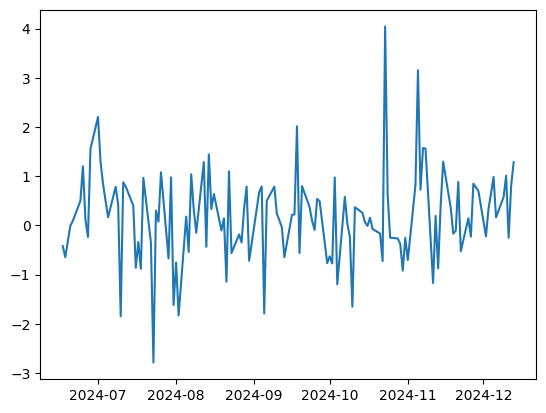

Total value of your porfolio is  15824.94628090719


In [8]:
data_tesla = yf.Ticker("TSLA")
his_tesla = data_tesla.history(period='6mo')
data_apple = yf.Ticker("AAPL")
his_apple = data_apple.history(period='6mo')
data_berkshireHathaway = yf.Ticker("BRK-B")
his_berkshireHathaway = data_berkshireHathaway.history(period='6mo')

his_tesla['daily_return']=0.0
his_apple['daily_return']=0.0
his_berkshireHathaway['daily_return']=0.0

his_tesla['portfolio_daily_return']=0.0
his_apple['portfolio_daily_return']=0.0
his_berkshireHathaway['portfolio_daily_return']=0.0

value = 10000 / 3
number_of_stocks_tesla = value / his_tesla["Open"].iloc[0]
number_of_stocks_apple = value / his_apple["Open"].iloc[0]
number_of_stocks_berkshireHathaway = value / his_berkshireHathaway["Open"].iloc[0]

for j in range(len(his_tesla) - 1):
    i = his_tesla.index[j]
    his_tesla.loc[i, "daily_return"] = (his_tesla["Close"].iloc[j + 1] - his_tesla["Close"].iloc[j]) / his_tesla["Close"].iloc[j]
    his_tesla.loc[i, "portfolio_daily_return"] = number_of_stocks_tesla * his_tesla["daily_return"].iloc[j]

for j in range(len(his_apple) - 1):
    i = his_apple.index[j]
    his_apple.loc[i, "daily_return"] = (his_apple["Close"].iloc[j + 1] - his_apple["Close"].iloc[j]) / his_apple["Close"].iloc[j]
    his_apple.loc[i, "portfolio_daily_return"] = number_of_stocks_apple * his_apple["daily_return"].iloc[j]

for j in range(len(his_berkshireHathaway) - 1):
    i = his_berkshireHathaway.index[j]
    his_berkshireHathaway.loc[i, "daily_return"] = (his_berkshireHathaway["Close"].iloc[j + 1] - his_berkshireHathaway["Close"].iloc[j]) / his_berkshireHathaway["Close"].iloc[j]
    his_berkshireHathaway.loc[i, "portfolio_daily_return"] = number_of_stocks_berkshireHathaway * his_berkshireHathaway["daily_return"].iloc[j]

his_tesla = his_tesla[:-1]
his_apple = his_apple[:-1]
his_berkshireHathaway = his_berkshireHathaway[:-1]

indices_date_array=his_tesla.index.to_numpy()
portfolio_return=np.array(his_tesla["portfolio_daily_return"]+his_apple["portfolio_daily_return"]+his_berkshireHathaway["portfolio_daily_return"])

plt.plot(indices_date_array,portfolio_return)
plt.show()

total_value_portfolio=number_of_stocks_tesla*his_tesla["Close"].iloc[-1]+number_of_stocks_apple*his_apple["Close"].iloc[-1]+number_of_stocks_berkshireHathaway*his_berkshireHathaway["Close"].iloc[-1]
print("Total value of your porfolio is ",total_value_portfolio)



2448383.8085171334


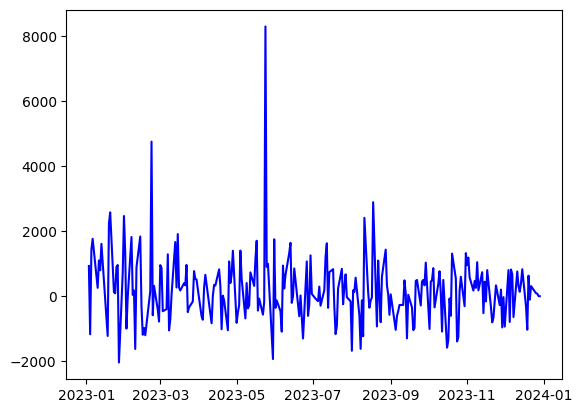

In [10]:
colors=['blue','pink','purple','black']
def trying(curr_stock,value):
    curr_stock["daily_return"]=0.0
    curr_stock["portfolio_daily_return"]=0.0
    number_of_stocks_curr=value/curr_stock["Open"].iloc[0]
    for j in range(len(curr_stock) - 1):
        i = curr_stock.index[j]
        curr_stock.loc[i, "daily_return"] = (curr_stock["Close"].iloc[j + 1] - curr_stock["Close"].iloc[j]) / curr_stock["Close"].iloc[j]
        curr_stock.loc[i, "portfolio_daily_return"] = number_of_stocks_curr * curr_stock["daily_return"].iloc[j]
    curr_stock=curr_stock[:-1]

def analyze_portfolio(tickers,weights,start_date,end_date,color_type):
    list_data=[]
    initial=[]
    for i in range(5):    
        x=yf.Ticker(tickers[i])
        list_data.append(x.history(start=start_date,end=end_date))
        initial.append(1000000*weights[i])
    indices_date_array=list_data[0].index.to_numpy()
    portfolio_return=0.0
    for i in range(5):
        trying(list_data[i],initial[i])
        portfolio_return+=list_data[i]["portfolio_daily_return"]
    portfolio_return_np=np.array(portfolio_return)
    plt.plot(indices_date_array,portfolio_return_np,color=colors[color_type])
    ans=0
    for i in range(5):
        ans+=(initial[i]/list_data[i]["Open"].iloc[0])*list_data[i]["Close"].iloc[-1]
    print("Total value of your portfolio is ",ans)




tickers=[]
for  i in range(5):
    x=input("Please give me the tickers")
    tickers.append(x)
weights1=[]
for  i in range(5):
    x=float(input("Give the weights of the stocks in the order you have entered the ticker ids"))
    weights1.append(x)
if (sum(weights1)!=1.0):
    print("sum of weights is not 1, please try again !")
    sys.exit()

x1=int(input("Enter start year(eg- 2023)"))
x2=int(input("Enter start month(eg- 1 for jan)"))
x3=int(input("Enter start date(1-31)"))
start_date=datetime(x1,x2,x3)
y1=int(input("Enter end year(eg- 2023)"))
y2=int(input("Enter end month(eg- 1 for jan)"))
y3=int(input("Enter end date(1-31)"))
end_date=datetime(y1,y2,y3)
analyze_portfolio(tickers,weights1,start_date,end_date,0)

#BONUS QUESTION

Total vaue of your portfolio 1 is  1823174.2644588496
Total vaue of your portfolio 2 is  952403.1423492967


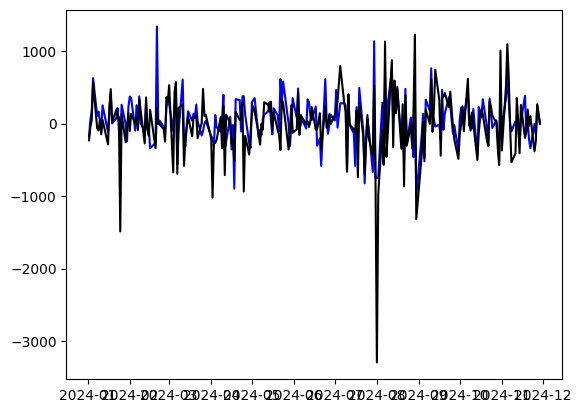

In [ ]:
colors=['blue','black']
def trying(curr_stock,value):
    curr_stock["daily_return"]=0.0
    curr_stock["portfolio_daily_return"]=0.0
    number_of_stocks_curr=value/curr_stock["Open"].iloc[0]
    for j in range(len(curr_stock) - 1):
        i = curr_stock.index[j]
        curr_stock.loc[i, "daily_return"] = (curr_stock["Close"].iloc[j + 1] - curr_stock["Close"].iloc[j]) / curr_stock["Close"].iloc[j]
        curr_stock.loc[i, "portfolio_daily_return"] = number_of_stocks_curr * curr_stock["daily_return"].iloc[j]
    curr_stock=curr_stock[:-1]


def analyze_portfolio(tickers,weights,start_date,end_date,color_type):
    list_data=[]
    initial=[]
    for i in range(5):    
        x=yf.Ticker(tickers[i])
        list_data.append(x.history(start=start_date,end=end_date))
        initial.append(1000000*weights[i])
    indices_date_array=list_data[0].index.to_numpy()
    portfolio_return=0.0
    for i in range(5):
        trying(list_data[i],initial[i])
        portfolio_return+=list_data[i]["portfolio_daily_return"]
    portfolio_return_np=np.array(portfolio_return)
    plt.plot(indices_date_array,portfolio_return_np,color=colors[color_type])
    ans=0
    for i in range(5):
        ans+=(initial[i]/list_data[i]["Open"].iloc[0])*list_data[i]["Close"].iloc[-1]
    print("Total value of your portfolio",color_type+1, "is ",ans)




tickers=[]
for  i in range(5):
    x=input("Please give me the tickers")
    tickers.append(x)
weights1=[]
for  i in range(5):
    x=float(input("Give the weights of the stocks in the order you have entered the ticker ids for first time"))
    weights1.append(x)
if (sum(weights1)!=1.0):
    print("sum of weights is not 1, please try again !")
    sys.exit()
weights2=[]
for  i in range(5):
    x=float(input("Give the weights of the stocks in the order you have entered the ticker ids for second time"))
    weights2.append(x)
if (sum(weights2)!=1.0):
    print("sum of weights is not 1, please try again !")
    sys.exit()
x1=int(input("Enter start year"))
x2=int(input("Enter start month"))
x3=int(input("Enter start date"))
start_date=datetime(x1,x2,x3)
x1=int(input("Enter end year"))
x2=int(input("Enter end month"))
x3=int(input("Enter end date"))
end_date=datetime(x1,x2,x3)

analyze_portfolio(tickers,weights1,start_date,end_date,0)
analyze_portfolio(tickers,weights2,start_date,end_date,1)

If you take the stocks to be Nvidia,tesla,microsoft,google and Intel

Their ticker ids are NVDA,TSLA,MSFT,GOOGL,INTC
and the first set of weights as - 0.4,0.3,0.1,0.1,0.1
and the second set of weights as - 0.1,0.1,0.1,0.1,0.6
Dates to be 2024-1-1 to 2024-12-1

You will see that the first portfolio significantly outperforms second portfolio as according to the changes in weights, nvidia and tesla has overall performed very great this year has a higher weightage in first porfolio that second, while in second portfolio intel has a higher weightage which is on a downward trend this year.